## Student name and ID

Megha Vijendra

1001736938

## Importing Libraries

Pandas for loading csv files Scikit-Learn for ML libraries MatplotLib for plotting graph

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree.export import export_text
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import metrics
import collections
import graphviz #pip install graphviz
import pydotplus #pip install pydotplus

import warnings
warnings.filterwarnings('ignore')

C:\Users\Meghs\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Loading the csv file

In [2]:
#read the csv file into a Pandas data frame
df_census = pd.read_csv("census1994.csv")

## Printing the first and last 5 records

In [3]:
#return the first 5 rows of the dataset
df_census.head(5)

,Date,Age,WorkClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,3/20/1994,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1/14/1994,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,8/14/1994,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3/17/1994,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,9/20/1994,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#return the last 5 rows of the dataset
df_census.tail(5)

,Date,Age,WorkClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
32556,12/29/1994,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,1/30/1994,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,9/26/1994,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,4/5/1994,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,3/5/1994,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
#return the class types in the df_census data frame
df_census.dtypes

Date              object
Age                int64
WorkClass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

## Removing Null values and ?

In [6]:
df_census = df_census[ df_census != " ?"]
df_census = df_census.dropna()

## Selecting 2 columns Age and Education number

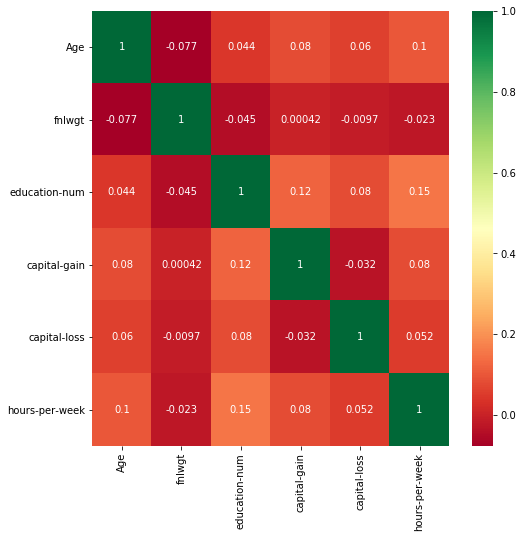

In [7]:
import seaborn as sns
X1 = df_census.drop(columns=['class','Date', 'WorkClass', 'education' , 'marital-status', 'occupation' , 'relationship','race', 'gender', 'native-country'])
y1 = df_census['class'].values
#get correlations of each features in dataset
corrmat = df_census.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(df_census[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
#we select education num and hours-per-week because it has the highest co-relation
selected_colums = ["education-num","hours-per-week"]
traget_column = ["class"]

In [9]:
X = df_census[selected_colums].values
y = df_census[traget_column].values

## Converting Class to 0's and 1's for ML libraries 

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder().fit(y)
y = labelencoder_Y.transform(y)
y = y.reshape(y.shape[0],1)

## Splitting the data in train and test set with ration of 70%

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

## Building Decision Tree Classification with criterion entropy

In [23]:
classifier_1 = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 42, max_depth=3)
#fit the classifier in the model
classifier_1.fit(X_train, y_train)
print(classifier_1)

# Predicting the Test set results
y_pred = classifier_1.predict(X_test)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


## Printing Confusion Matrix

In [24]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))
cm = confusion_matrix(y_test, y_pred)
print(" \t{}\t{}".format("FALSE","TRUE"))
print("FALSE\t{}\t{}".format(cm[0][0],cm[0][1]))
print("TRUE\t{}\t{}".format(cm[1][0],cm[1][1]))

Accuracy: 0.7815
 	FALSE	TRUE
FALSE	6232	535
TRUE	1442	840


## Plotting Bar graph to compare Confusion Matrix

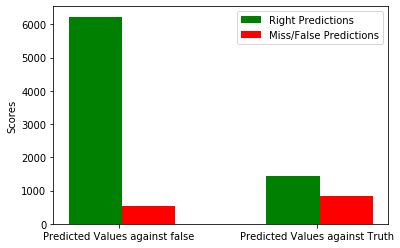

In [25]:
bar_1 = [cm[0][0],cm[1][0]]
bar_2 = [cm[0][1],cm[1][1]]
N = 3
ind = np.arange(2)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = bar_1
rects1 = ax.bar(ind, yvals, width, color='g')
zvals = bar_2
rects2 = ax.bar(ind+width, zvals, width, color='r')

ax.set_ylabel('Scores')
ax.set_xticks(ind + 0.12)
ax.set_xticklabels( ("Predicted Values against false","Predicted Values against Truth") )
ax.legend( (rects1[0], rects2[0]), ('Right Predictions', 'Miss/False Predictions') )


plt.show()

## Printing Classification Report

In [26]:
print(classification_report(y_test, y_pred, target_names=selected_colums))

                precision    recall  f1-score   support

 education-num       0.81      0.92      0.86      6767
hours-per-week       0.61      0.37      0.46      2282

      accuracy                           0.78      9049
     macro avg       0.71      0.64      0.66      9049
  weighted avg       0.76      0.78      0.76      9049



## Visualization of the Decision Tree using Entropy

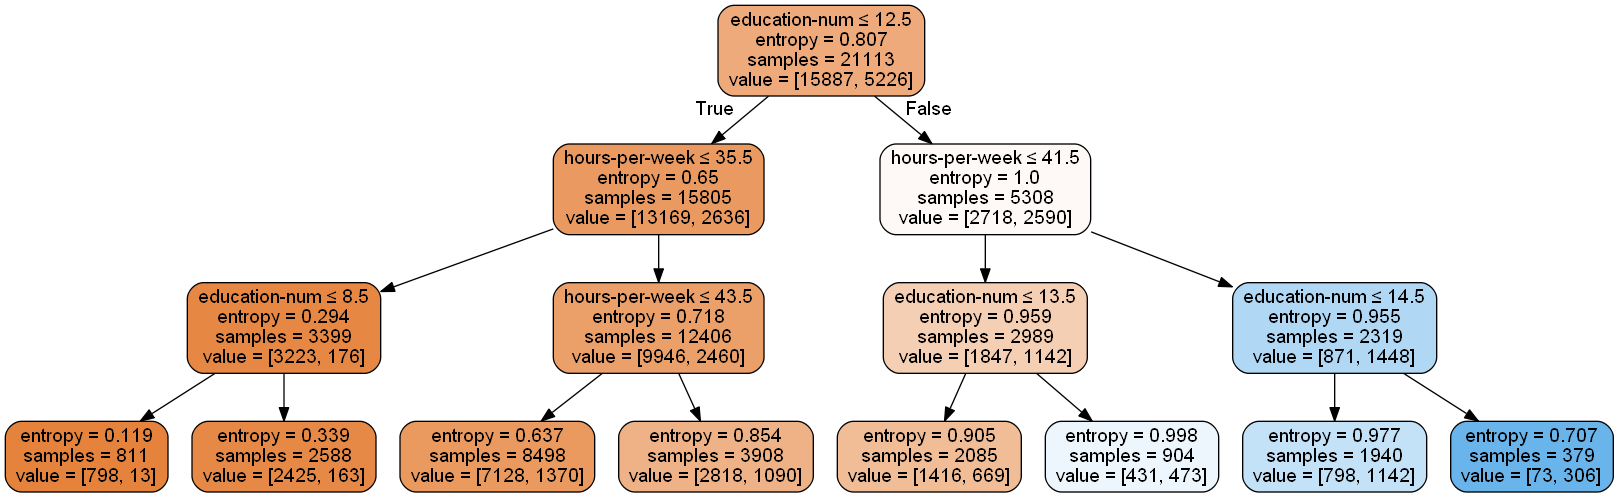

In [27]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier_1 , out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = selected_colums)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('entropy.png')
Image(graph.create_png())

## Derive rules of Decision Tree

In [28]:
from sklearn.tree.export import export_text

tree_rules = export_text(classifier_1, feature_names= selected_colums)
print(tree_rules)

|--- education-num <= 12.50
|   |--- hours-per-week <= 35.50
|   |   |--- education-num <= 8.50
|   |   |   |--- class: 0
|   |   |--- education-num >  8.50
|   |   |   |--- class: 0
|   |--- hours-per-week >  35.50
|   |   |--- hours-per-week <= 43.50
|   |   |   |--- class: 0
|   |   |--- hours-per-week >  43.50
|   |   |   |--- class: 0
|--- education-num >  12.50
|   |--- hours-per-week <= 41.50
|   |   |--- education-num <= 13.50
|   |   |   |--- class: 0
|   |   |--- education-num >  13.50
|   |   |   |--- class: 1
|   |--- hours-per-week >  41.50
|   |   |--- education-num <= 14.50
|   |   |   |--- class: 1
|   |   |--- education-num >  14.50
|   |   |   |--- class: 1



## Building data to plot graph

In [25]:
X_Plot_True = []
Y_Plot_True = []
X_Plot_False = []
Y_Plot_False = []
X_SAMPLE, _, Y_SAMPLE, _ = train_test_split(X_test, y_test, test_size = 0.90, random_state = 42)
for i,j in zip(X_SAMPLE,Y_SAMPLE):
    if j == 1:
        X_Plot_True.append(i[0])
        Y_Plot_True.append(i[1])
    else:
        X_Plot_False.append(i[0])
        Y_Plot_False.append(i[1])

## Plotting Graph

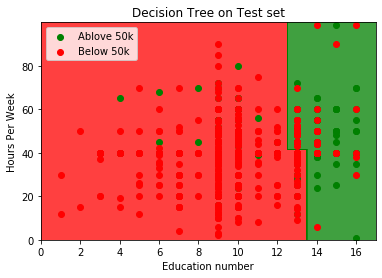

In [32]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = X_SAMPLE[:, 0].min() - 1, stop = X_SAMPLE[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_SAMPLE[:, 1].min() - 1, stop = X_SAMPLE[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.scatter(X_Plot_True, Y_Plot_True,c = ["Green"], label="Ablove 50k")
plt.scatter(X_Plot_False, Y_Plot_False,c = ["Red"], label="Below 50k")
plt.title('Decision Tree on Test set')
plt.xlabel('Education number')
plt.ylabel('Hours Per Week')
plt.legend()
plt.show()

## Building Decision Tree Classification with criterion Gini

In [29]:
classifier_2 = DecisionTreeClassifier(criterion = 'gini', random_state = 42, max_depth=3)
#fit the classifier in the model
classifier_2.fit(X_train, y_train)
print(classifier_2)

# Predicting the Test set results
y_pred = classifier_2.predict(X_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


## Printing Confusion Matrix

In [30]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))
cm = confusion_matrix(y_test, y_pred)
print(" \t{}\t{}".format("FALSE","TRUE"))
print("FALSE\t{}\t{}".format(cm[0][0],cm[0][1]))
print("TRUE\t{}\t{}".format(cm[1][0],cm[1][1]))

Accuracy: 0.7815
 	FALSE	TRUE
FALSE	6232	535
TRUE	1442	840


## Plotting Bar graph to compare Confusion Matrix

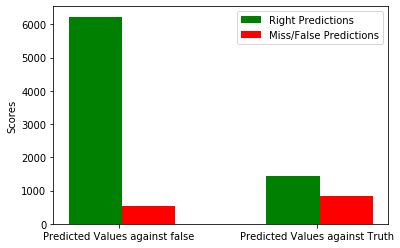

In [31]:
bar_1 = [cm[0][0],cm[1][0]]
bar_2 = [cm[0][1],cm[1][1]]
N = 3
ind = np.arange(2)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = bar_1
rects1 = ax.bar(ind, yvals, width, color='g')
zvals = bar_2
rects2 = ax.bar(ind+width, zvals, width, color='r')

ax.set_ylabel('Scores')
ax.set_xticks(ind + 0.12)
ax.set_xticklabels( ("Predicted Values against false","Predicted Values against Truth") )
ax.legend( (rects1[0], rects2[0]), ('Right Predictions', 'Miss/False Predictions') )

plt.show()

## Printing Classification Report

In [32]:
print(classification_report(y_test, y_pred, target_names=selected_colums))

                precision    recall  f1-score   support

 education-num       0.81      0.92      0.86      6767
hours-per-week       0.61      0.37      0.46      2282

      accuracy                           0.78      9049
     macro avg       0.71      0.64      0.66      9049
  weighted avg       0.76      0.78      0.76      9049



## Visualization of the Decision Tree using Gini

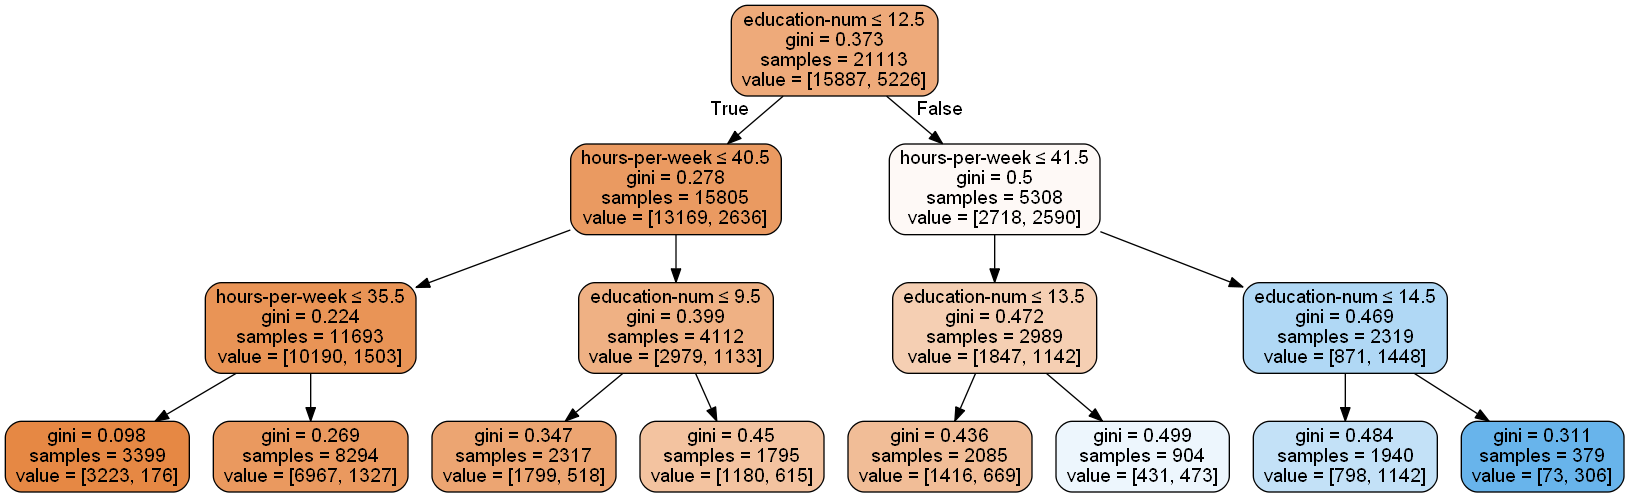

In [37]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier_2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = selected_colums)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('gini.png')
Image(graph.create_png())

## Derive rules of Decision Tree

In [38]:
from sklearn.tree.export import export_text

tree_rules = export_text(classifier_2, feature_names= selected_colums)
print(tree_rules)

|--- education-num <= 12.50
|   |--- hours-per-week <= 40.50
|   |   |--- hours-per-week <= 35.50
|   |   |   |--- class: 0
|   |   |--- hours-per-week >  35.50
|   |   |   |--- class: 0
|   |--- hours-per-week >  40.50
|   |   |--- education-num <= 9.50
|   |   |   |--- class: 0
|   |   |--- education-num >  9.50
|   |   |   |--- class: 0
|--- education-num >  12.50
|   |--- hours-per-week <= 41.50
|   |   |--- education-num <= 13.50
|   |   |   |--- class: 0
|   |   |--- education-num >  13.50
|   |   |   |--- class: 1
|   |--- hours-per-week >  41.50
|   |   |--- education-num <= 14.50
|   |   |   |--- class: 1
|   |   |--- education-num >  14.50
|   |   |   |--- class: 1



## Building data to plot graph

In [39]:
X_Plot_True = []
Y_Plot_True = []
X_Plot_False = []
Y_Plot_False = []
X_SAMPLE, _, Y_SAMPLE, _ = train_test_split(X_test, y_test, test_size = 0.90, random_state = 42)
for i,j in zip(X_SAMPLE,Y_SAMPLE):
    if j == 1:
        X_Plot_True.append(i[0])
        Y_Plot_True.append(i[1])
    else:
        X_Plot_False.append(i[0])
        Y_Plot_False.append(i[1])

## Plotting Graph

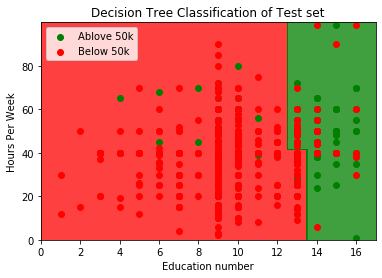

In [40]:
from matplotlib.colors import ListedColormap
X1, X2 = np.meshgrid(np.arange(start = X_SAMPLE[:, 0].min() - 1, stop = X_SAMPLE[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_SAMPLE[:, 1].min() - 1, stop = X_SAMPLE[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.scatter(X_Plot_True, Y_Plot_True,c = ["Green"], label="Ablove 50k")
plt.scatter(X_Plot_False, Y_Plot_False,c = ["Red"], label="Below 50k")
plt.title('Decision Tree Classification of Test set')
plt.xlabel('Education number')
plt.ylabel('Hours Per Week')
plt.legend()
plt.show()